## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


In [1]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ['CUDA_VISIBLE_DEVICES'] = ""

In [45]:
train, test = keras.datasets.cifar10.load_data()

In [59]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True): # x 正規化
    x = (x-x.min())/(x.max()-x.min())
    if flatten:
        x = x.reshape(len(x), -1)
    return x

def preproc_y(y, num_classes = 10): # y OneHotCoding
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [60]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [62]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units = 10, num_neurons = [512, 256, 128, 64, 32]):
    
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units = n_units, activation = "relu", name = "hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units = n_units, activation = "relu", name = "hidden_layer"+str(i+1))(x)
         
    out = keras.layers.Dense(units = output_units, activation = "softmax")(x)
    
    model = keras.models.Model(inputs = [input_layer], outputs = [out])
    
    return model

model = build_mlp(input_shape = x_train.shape[1:])
model.summary()


Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

In [63]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [64]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [65]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/100
196/196 [==============================] - 2s 12ms/step - loss: 1.9743 - accuracy: 0.2804 - val_loss: 1.8378 - val_accuracy: 0.3452
Epoch 2/100
196/196 [==============================] - 2s 11ms/step - loss: 1.7485 - accuracy: 0.3714 - val_loss: 1.7014 - val_accuracy: 0.3904
Epoch 3/100
196/196 [==============================] - 2s 11ms/step - loss: 1.6626 - accuracy: 0.4060 - val_loss: 1.5989 - val_accuracy: 0.4325
Epoch 4/100
196/196 [==============================] - 2s 11ms/step - loss: 1.5837 - accuracy: 0.4326 - val_loss: 1.5836 - val_accuracy: 0.4368
Epoch 5/100
196/196 [==============================] - 2s 11ms/step - loss: 1.5497 - accuracy: 0.4468 - val_loss: 1.5686 - val_accuracy: 0.4430
Epoch 6/100
196/196 [==============================] - 2s 11ms/step - loss: 1.4919 - accuracy: 0.4672 - val_loss: 1.5100 - val_accuracy: 0.4620
Epoch 7/100
196/196 [==============================] - 2s 11ms/step - loss: 1.4691 - accuracy: 0.4773 - val_loss: 1.5086 - val_accuracy:

196/196 [==============================] - 2s 12ms/step - loss: 0.5908 - accuracy: 0.7879 - val_loss: 1.9277 - val_accuracy: 0.5130
Epoch 58/100
196/196 [==============================] - 2s 11ms/step - loss: 0.5887 - accuracy: 0.7878 - val_loss: 1.9698 - val_accuracy: 0.5048
Epoch 59/100
196/196 [==============================] - 2s 11ms/step - loss: 0.5910 - accuracy: 0.7870 - val_loss: 2.0871 - val_accuracy: 0.4932
Epoch 60/100
196/196 [==============================] - 2s 11ms/step - loss: 0.5773 - accuracy: 0.7929 - val_loss: 2.0771 - val_accuracy: 0.5001
Epoch 61/100
196/196 [==============================] - 2s 11ms/step - loss: 0.5586 - accuracy: 0.7994 - val_loss: 2.0523 - val_accuracy: 0.5068
Epoch 62/100
196/196 [==============================] - 2s 11ms/step - loss: 0.5499 - accuracy: 0.8005 - val_loss: 2.0905 - val_accuracy: 0.5134
Epoch 63/100
196/196 [==============================] - 2s 11ms/step - loss: 0.5376 - accuracy: 0.8072 - val_loss: 2.1268 - val_accuracy: 0.509

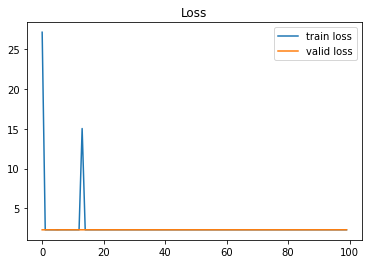

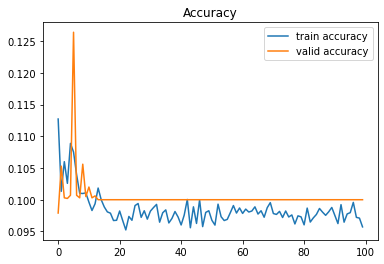

In [53]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()